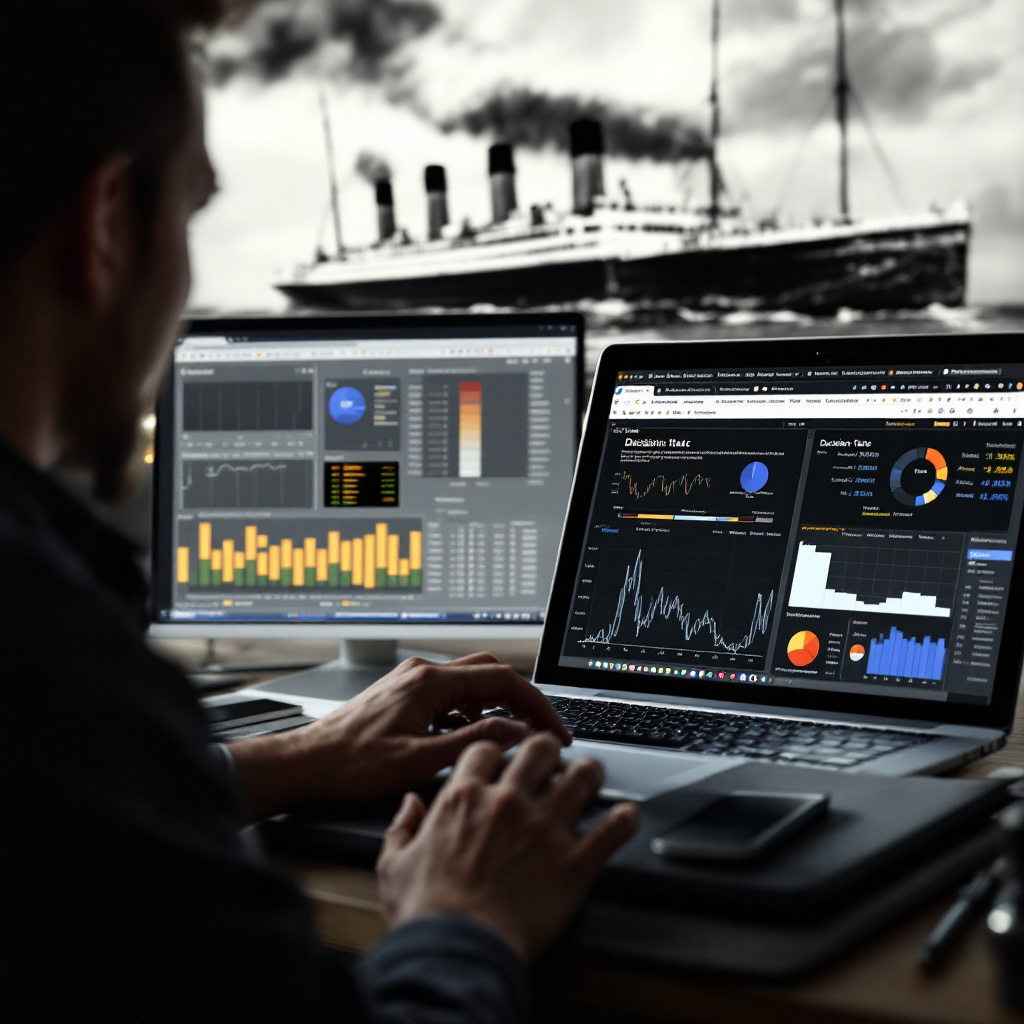

In [1]:
from IPython.display import Image

Image(filename='/kaggle/input/d/ferasalshash/titanic/L49TtbPP5Awe2F40bWoOF.jpg')

# Loading Required Modules


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc,precision_recall_curve, average_precision_score

# Reading Data from CSV


In [3]:
orginal_data_train=pd.read_csv("/kaggle/input/titanic/train.csv")
orginal_data_test=pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
data_train=orginal_data_train.copy()
data_test=orginal_data_test.copy()

In [5]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Getting Data Summary


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Handling empty values ​​from training data

In [9]:
data_train["Age"]=data_train["Age"].fillna(data_train["Age"].mean())

In [10]:
data_train=data_train.drop("Cabin", axis=1)

In [11]:
data_train=data_train.dropna()

## Handling empty values ​​from testing data

In [12]:
data_test["Age"]=data_test["Age"].fillna(data_test["Age"].mean())

In [13]:
data_test=data_test.drop("Cabin", axis=1)

In [14]:
data_test=data_test.dropna()

## Delete name column

In [15]:
data_train=data_train.drop("Name", axis=1)
data_test=data_test.drop("Name", axis=1)

## Delete PassengerId column

In [16]:
data_train=data_train.drop("PassengerId", axis=1)
data_test=data_test.drop("PassengerId", axis=1)

## Delete Ticket column

In [17]:
data_train=data_train.drop("Ticket", axis=1)
data_test=data_test.drop("Ticket", axis=1)

## Convert Age column format

In [18]:
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.50000,0,0,7.8292,Q
1,3,female,47.00000,1,0,7.0000,S
2,2,male,62.00000,0,0,9.6875,Q
3,3,male,27.00000,0,0,8.6625,S
4,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,30.27259,0,0,8.0500,S
414,1,female,39.00000,0,0,108.9000,C
415,3,male,38.50000,0,0,7.2500,S
416,3,male,30.27259,0,0,8.0500,S


In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [20]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [21]:
numeric_data=data_train.select_dtypes(["int64","float64"])
numeric_data

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.000000,1,0,7.2500
1,1,1,38.000000,1,0,71.2833
2,1,3,26.000000,0,0,7.9250
3,1,1,35.000000,1,0,53.1000
4,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000
887,1,1,19.000000,0,0,30.0000
888,0,3,29.699118,1,2,23.4500
889,1,1,26.000000,0,0,30.0000


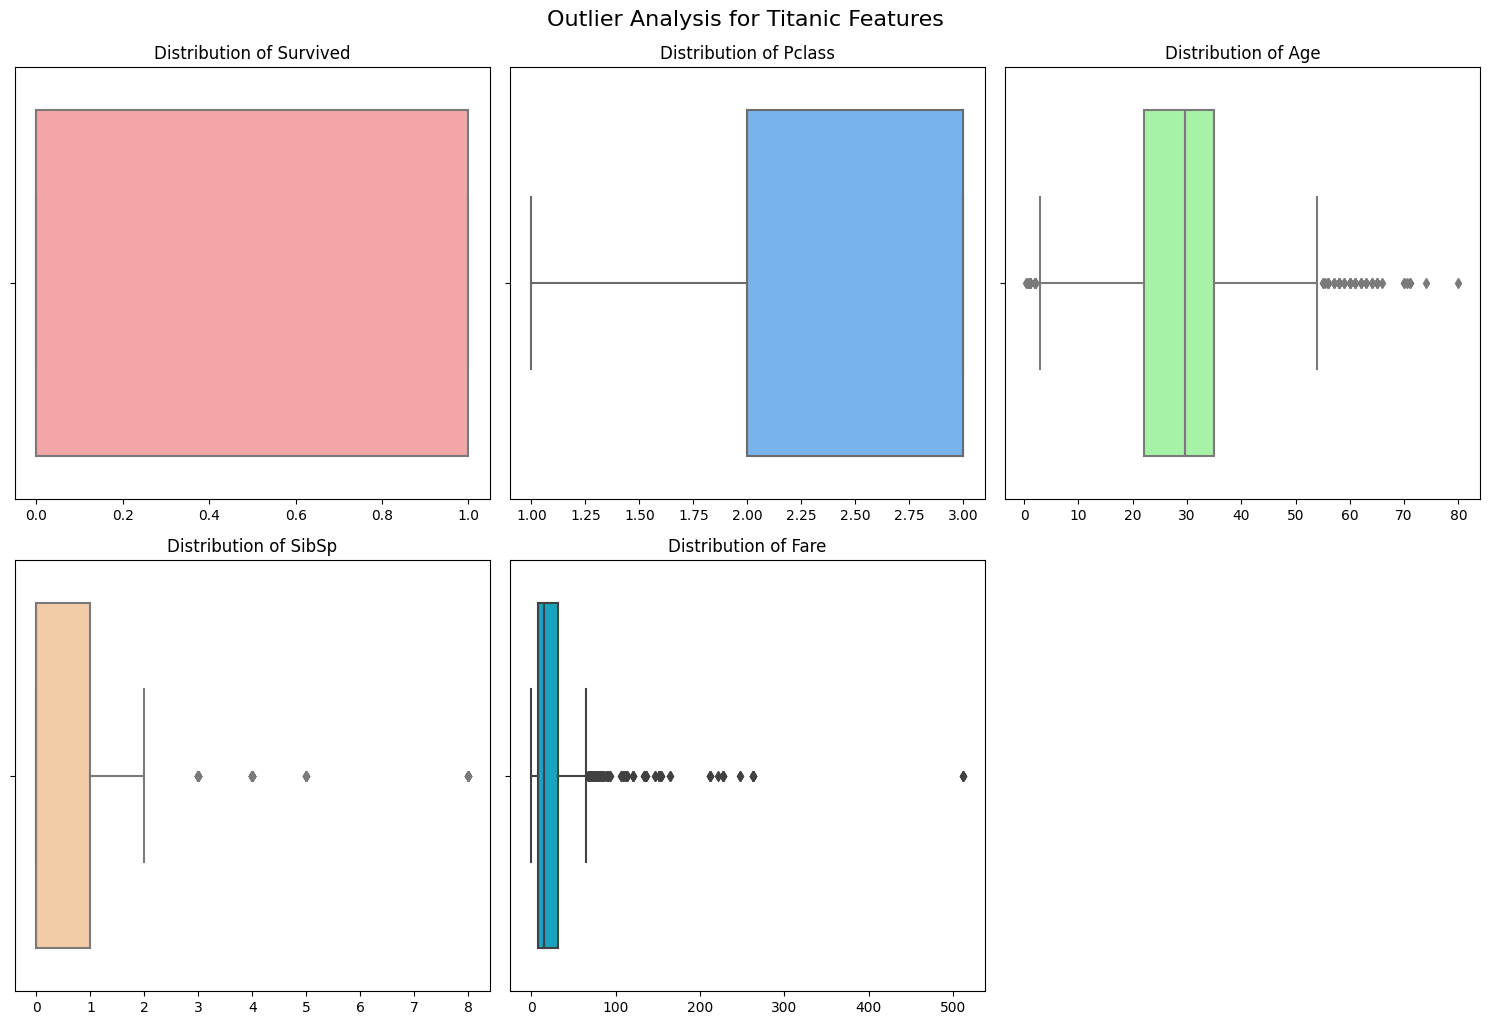

In [22]:
NC=numeric_data.drop("Parch", axis=1)


plt.figure(figsize=(15, 10))
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#00b4d8', '#80ed99']

for i, j in enumerate(NC):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=NC[j], color=colors[i])
    plt.title(f'Distribution of {j}', fontsize=12)
    plt.xlabel('')

plt.tight_layout()
plt.suptitle('Outlier Analysis for Titanic Features', fontsize=16, y=1.02)
plt.show()

## Values ​​greater than or equal to 500 are removed.

In [23]:
data_train = data_train[data_train["Fare"] < 250]
data_test = data_test[data_test["Fare"] < 250]

In [24]:
data_train = data_train[data_train["Age"] > 0]
data_test = data_test[data_test["Age"] > 0]

Outliers can be kept to understand the full distribution of the data and identify any unexpected patterns.

If outliers significantly affect the model, it may be necessary to reprocess it.

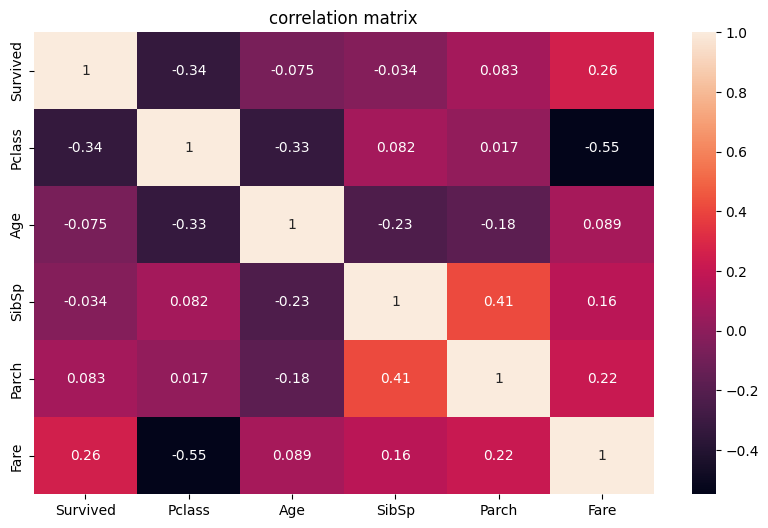

In [25]:
correlation=numeric_data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation, annot=True )
plt.title("correlation matrix")
plt.show()

## * Survival and ticket class (Pclass):

 There is a moderate negative association between survival and ticket class. This means that passengers in classes 1 and 2 were more likely to survive than passengers in class 3.

## * Survival and number of spouses/siblings (SibSp):

 There is a weak negative association between survival and number of spouses/siblings. This means that passengers who were travelling alone were more likely to survive.

## * Survival and number of parents/children (Parch):

 There is a weak negative association between survival and number of parents/children. This means that passengers who were travelling alone or with a spouse were more likely to survive.

# The relationship between ticket class (Pclass) and passenger survival

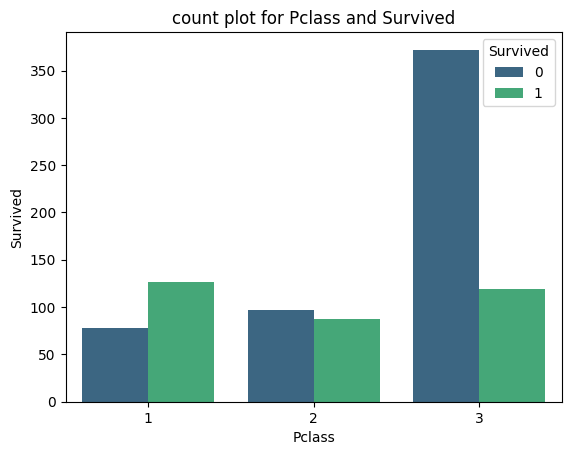

In [26]:
sns.countplot(data=data_train, x='Pclass', hue='Survived', palette="viridis")
plt.title("count plot for Pclass and Survived")
plt.xlabel("Pclass")
plt.ylabel("Survived")
plt.show()


## (Pclass=1): We notice that the number of survivors in class I is much higher than the number of deceased, indicating that passengers in this class had a greater chance of survival.


## (Pclass=2): The graph shows that the number of survivors in class II is lower compared to class I, but still higher than the number of deceased in class III.


## (Pclass=3): We notice that the number of deceased in this class is higher than the other two classes, indicating that passengers in this class had the least chance of survival.



---



# Does age affect survival chances?

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


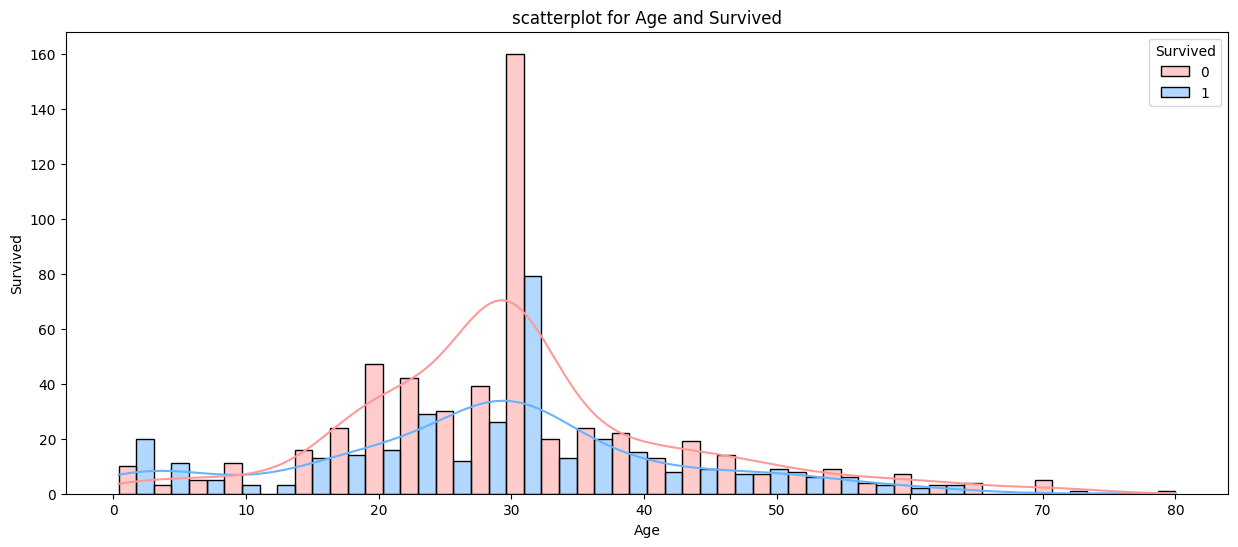

In [27]:
plt.figure(figsize=(15,6))
sns.histplot(data=data_train, x='Age', hue='Survived', palette=['#ff9999','#66b3ff'] ,multiple="dodge", kde=True)
plt.title("scatterplot for Age and Survived")
plt.xlabel("Age")
plt.ylabel("Survived")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


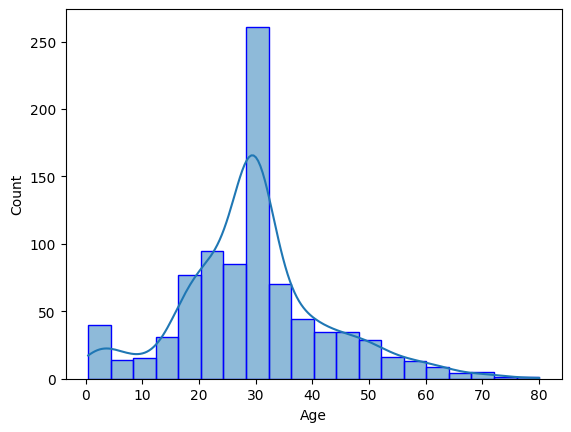

In [28]:
sns.histplot(data_train['Age'], bins=20, edgecolor="blue", kde=True )
plt.show()

Due to the high number of passengers in this age group, the number of survivors and deaths in this age group will also be high compared to other age groups.

---



# Does gender affect survival chances?

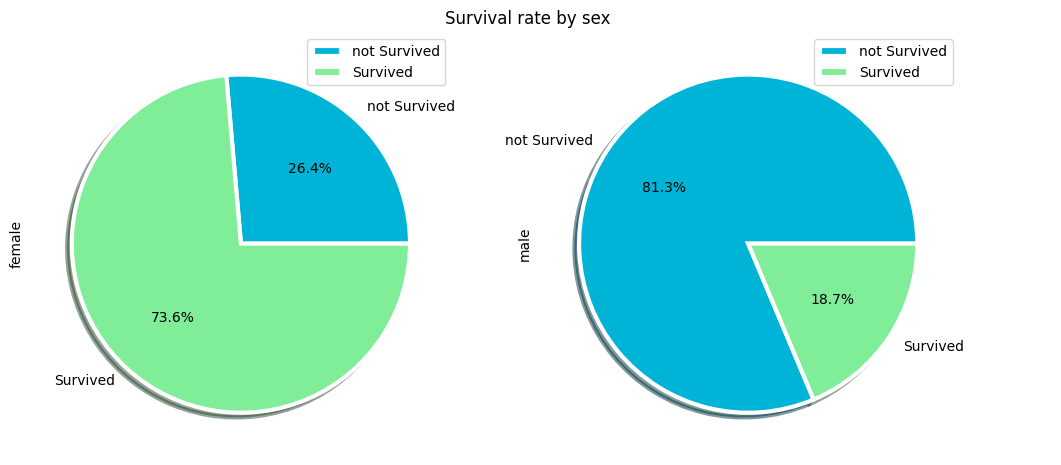

In [29]:
survived_by_sex = data_train.groupby(['Survived', 'Sex']).size().unstack()

survived_by_sex.plot(kind="pie", figsize=(12, 6), subplots=True, autopct='%1.1f%%', labels=["not Survived", "Survived"], shadow=True, colors=['#00b4d8', '#80ed99'],
 wedgeprops={"linewidth": 3, "edgecolor": "white"})
plt.title("Survival rate by sex                                                                                    ")
plt.show()

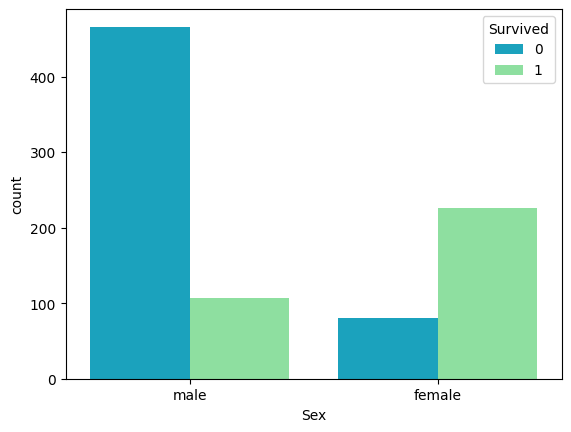

In [30]:
sns.countplot(x='Sex', hue='Survived', data=data_train, palette=['#00b4d8', '#80ed99'])
plt.show()

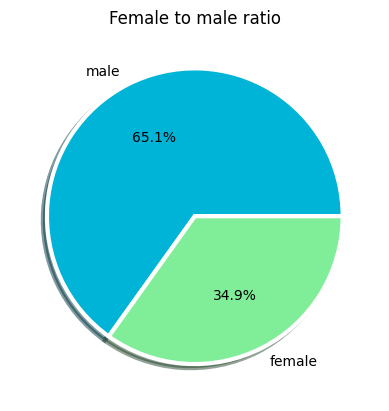

In [31]:
plt.pie(data_train["Sex"].value_counts(), autopct='%1.1f%%', labels=data_train["Sex"].unique(), shadow=True, colors=['#00b4d8', '#80ed99'],  wedgeprops={"linewidth": 3, "edgecolor": "white"})
plt.title("Female to male ratio")
plt.show()

It is clear that the percentage of women who survived is much higher than the percentage of men. This indicates that women were more likely to survive this event, even though there were more women than men.

# Does the ticket price affect the chances of staying?

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


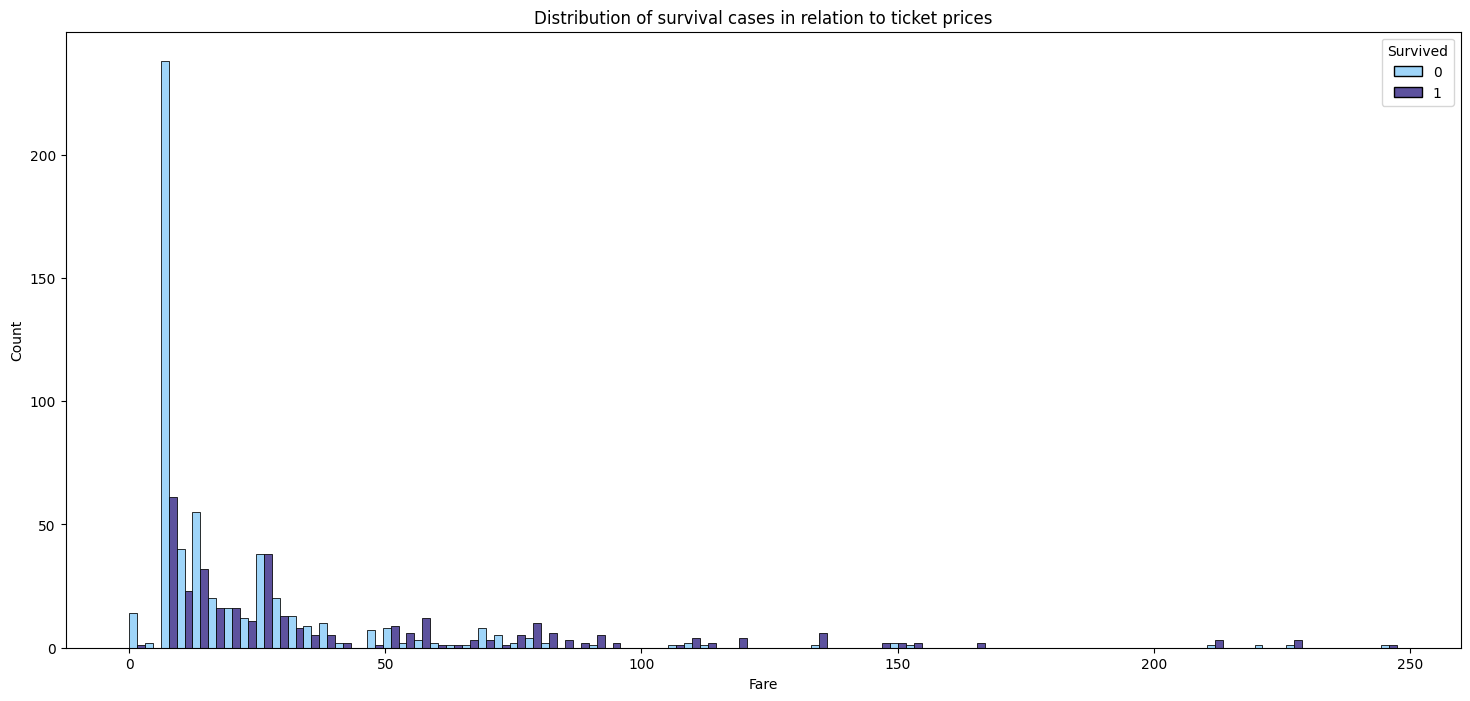

In [32]:
plt.figure(figsize=(18,8))
sns.histplot(data=data_train, x="Fare", hue="Survived", bins=80, multiple="dodge", palette=["#7fc8f8", "#27187e"])
plt.title("Distribution of survival cases in relation to ticket prices")
plt.show()

We conclude that it appears that passengers who bought more expensive tickets were more likely to survive.

---



In [33]:
data_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


# Encoding

In [34]:
gender={"female":0, "male":1}
data_train["Sex"]=data_train["Sex"].apply(lambda x: gender[x])
data_test["Sex"]=data_test["Sex"].apply(lambda x: gender[x])

In [35]:
Embarked={"S":0, "C":1, "Q":2}
data_train["Embarked"]=data_train["Embarked"].apply(lambda x: Embarked[x])
data_test["Embarked"]=data_test["Embarked"].apply(lambda x: Embarked[x])

In [36]:
data_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,2
1,3,0,47.00000,1,0,7.0000,0
2,2,1,62.00000,0,0,9.6875,2
3,3,1,27.00000,0,0,8.6625,0
4,3,0,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,0
414,1,0,39.00000,0,0,108.9000,1
415,3,1,38.50000,0,0,7.2500,0
416,3,1,30.27259,0,0,8.0500,0


# Preparing Data for Modeling


In [37]:
X=data_train.drop("Survived", axis=1)
y=data_train["Survived"]

In [38]:
X_train, X_test, y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
data_test=scaler.transform(data_test)

In [40]:
LR_model=LogisticRegression()
LR_model

LogisticRegression()

## Defining Hyperparameter Grid


In [41]:
grid_param_LR=[
    {"solver": ["lbfgs"], "penalty": ["l2"], "C": [0.1, 0.5, 1], "max_iter": [100, 200, 300, 500, 1000]},
    {"solver": ["liblinear"], "penalty": ["l1", "l2"], "C": [0.1, 0.5, 1], "max_iter": [100, 200, 300, 500, 1000]}
]

In [42]:
grid_serch_LR=GridSearchCV(LR_model,grid_param_LR,cv=5)
grid_serch_LR.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.1, 0.5, 1],
                          'max_iter': [100, 200, 300, 500, 1000],
                          'penalty': ['l2'], 'solver': ['lbfgs']},
                         {'C': [0.1, 0.5, 1],
                          'max_iter': [100, 200, 300, 500, 1000],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']}])

In [43]:
print("The Best Parameters for LogisticRegression are:",grid_serch_LR.best_params_ )

The Best Parameters for LogisticRegression are: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


In [44]:
Best_LR_model=grid_serch_LR.best_estimator_

In [45]:
y_pred_LR=Best_LR_model.predict(X_test)

# Evaluating Model Performance


In [46]:
LR_Accuracy=accuracy_score(y_test,y_pred_LR)
LR_Recall=recall_score(y_test,y_pred_LR)
LR_Precision=precision_score(y_test,y_pred_LR)
LR_F1=f1_score(y_test,y_pred_LR)

print(" LogisticRegression Accuracy Score is  :" , LR_Accuracy  )
print(" LogisticRegression Precion Score is  :" , LR_Precision )
print(" LogisticRegression Recall Score is  :" , LR_Recall )
print(" LogisticRegression F1 Score is  :" , LR_F1 )


 LogisticRegression Accuracy Score is  : 0.7386363636363636
 LogisticRegression Precion Score is  : 0.6857142857142857
 LogisticRegression Recall Score is  : 0.6666666666666666
 LogisticRegression F1 Score is  : 0.676056338028169


In [47]:
y_pred_test = Best_LR_model.predict(data_test)

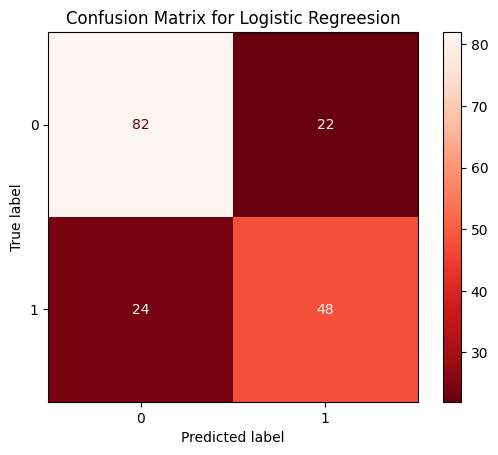

In [48]:
cm_LR=confusion_matrix(y_test,y_pred_LR)
disp_LR=ConfusionMatrixDisplay(confusion_matrix=cm_LR)
disp_LR.plot(cmap="Reds_r")
plt.title("Confusion Matrix for Logistic Regreesion")
plt.show()

In [49]:
fpr_LR, tpr_LR, _=roc_curve(y_test,y_pred_LR)
AUC_LR=auc(fpr_LR,tpr_LR)

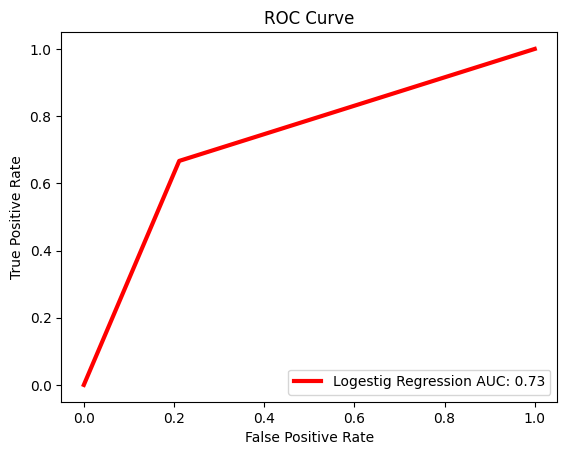

In [50]:
plt.plot(fpr_LR, tpr_LR, label=f"Logestig Regression AUC: {AUC_LR:.2f}" , lw=3 , color = 'red')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

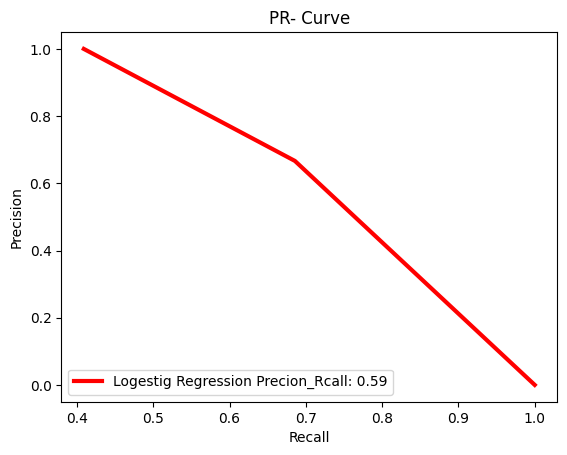

In [51]:
PR_LR=average_precision_score(y_test,y_pred_LR)
Recall_LR_curve, Precision_LR_curve,_ =precision_recall_curve(y_test,y_pred_LR)
plt.plot(Recall_LR_curve, Precision_LR_curve, label=f"Logestig Regression Precion_Rcall: {PR_LR:.2f}", lw=3, color="red" )
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR- Curve')
plt.legend(loc='lower left')
plt.show()

# Decision Tree Classifier

This model does not require scaling.

In [52]:
from sklearn.tree import DecisionTreeClassifier

In [53]:
X_train_DT, X_test_DT, y_train_DT,y_test_DT=train_test_split(X,y,test_size=0.2, random_state=42)

In [54]:
DT_model= DecisionTreeClassifier(criterion="entropy", max_depth=3, max_features=7)
DT_model.fit(X_train_DT, y_train_DT)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=7)

In [55]:
y_pred_DT=DT_model.predict(X_test_DT)

In [56]:
DT_Accuracy=accuracy_score(y_test_DT,y_pred_DT)
DT_Recall=recall_score(y_test_DT,y_pred_DT)
DT_Precision=precision_score(y_test_DT,y_pred_DT)
DT_F1=f1_score(y_test_DT,y_pred_DT)


print(" Decision Tree Classifier Accuracy Score is  :" , DT_Accuracy  )
print(" Decision Tree Classifier Precion Score is  :" , DT_Precision )
print(" Decision Tree Classifier Recall Score is  :" , DT_Recall )
print(" Decision Tree Classifier F1 Score is  :" , DT_F1 )

 Decision Tree Classifier Accuracy Score is  : 0.7840909090909091
 Decision Tree Classifier Precion Score is  : 0.7428571428571429
 Decision Tree Classifier Recall Score is  : 0.7222222222222222
 Decision Tree Classifier F1 Score is  : 0.732394366197183


# Plotting the Confusion Matrix

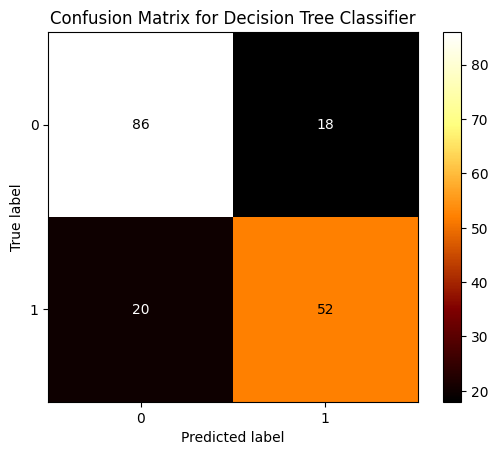

In [57]:
cm_DT=confusion_matrix(y_test_DT,y_pred_DT)
disp_DT=ConfusionMatrixDisplay(confusion_matrix=cm_DT)
disp_DT.plot(cmap="afmhot")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# ROC Curve



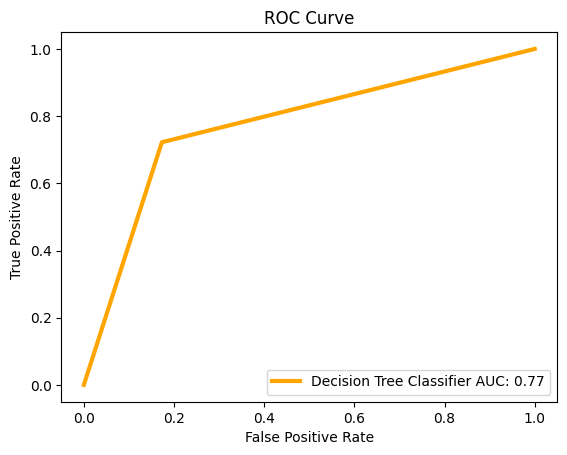

In [58]:
fpr_DT, tpr_DT, _ = roc_curve(y_test_DT,y_pred_DT)
auc_DT=auc(fpr_DT,tpr_DT)
plt.plot(fpr_DT,tpr_DT , label=f"Decision Tree Classifier AUC: {auc_DT:.2f}" ,lw=3, color="orange")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# PR

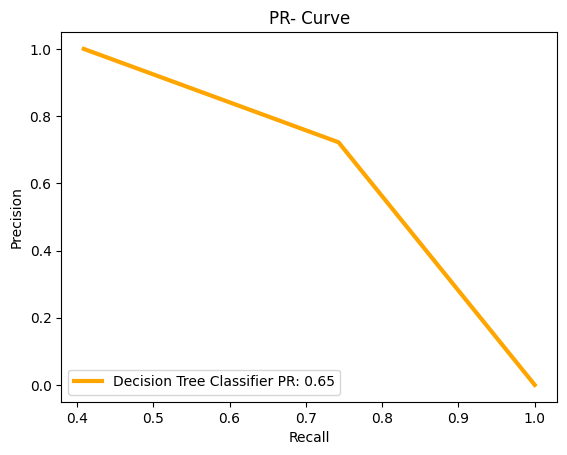

In [59]:
PR_DT=average_precision_score(y_test_DT, y_pred_DT)
recall_DT, precision_DT, _=precision_recall_curve(y_test_DT, y_pred_DT)
plt.plot(recall_DT,precision_DT , label=f"Decision Tree Classifier PR: {PR_DT:.2f}" ,lw=3, color="orange")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR- Curve')
plt.legend(loc='lower left')
plt.show()

# Data Splitting and Hyperparameter Grid for Decision Tree

In [60]:
X_train_Dt, X_test_Dt, y_train_Dt,y_test_Dt=train_test_split(X,y,test_size=0.3, random_state=42)
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,1,2,3,4,6,8],
    'max_features': [None, 'sqrt', 'log2', 0.5]
}

## Creating a Decision Tree Classifier

In [61]:
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

# Setting up Grid Search for Decision Tree

In [62]:
grid_search = GridSearchCV(dt, param_grid, cv=5)
print(type(grid_search))
grid_search.fit(X_train_Dt, y_train_Dt)
print("Best Parameters Using Grid Search for Decision Tree Classifier:", grid_search.best_params_)

<class 'sklearn.model_selection._search.GridSearchCV'>
Best Parameters Using Grid Search for Decision Tree Classifier: {'criterion': 'entropy', 'max_depth': 6, 'max_features': None}


Decision Tree Model

In [63]:
Best_Dt_Model=grid_search.best_estimator_
Best_Dt_Model

DecisionTreeClassifier(criterion='entropy', max_depth=6)

# Scoring the Decision Tree Model


In [64]:
Best_Dt_Model_score=Best_Dt_Model.score(X_test_Dt, y_test_Dt)
Best_Dt_Model_score

0.803030303030303

# Generating Predictions


In [65]:
y_pred_Dt=Best_Dt_Model.predict(X_test_Dt)

# Evaluating Decision Tree Classifier Performance

In [66]:
Dt_Accuracy=accuracy_score(y_test_Dt,y_pred_Dt)
Dt_Recall=recall_score(y_test_Dt,y_pred_Dt, average="weighted")
Dt_Precision=precision_score(y_test_Dt,y_pred_Dt, average="weighted")
Dt_F1=f1_score(y_test_Dt,y_pred_Dt, average="weighted")


print(" Decision Tree Classifier Accuracy Score is  :" , Dt_Accuracy  )
print(" Decision Tree Classifier Precion Score is  :" , Dt_Precision )
print(" Decision Tree Classifier Recall Score is  :" , Dt_Recall )
print(" Decision Tree Classifier F1 Score is  :" , Dt_F1 )

 Decision Tree Classifier Accuracy Score is  : 0.803030303030303
 Decision Tree Classifier Precion Score is  : 0.8097211994520591
 Decision Tree Classifier Recall Score is  : 0.803030303030303
 Decision Tree Classifier F1 Score is  : 0.7978573614937251


# Visualizing the Decision Tree


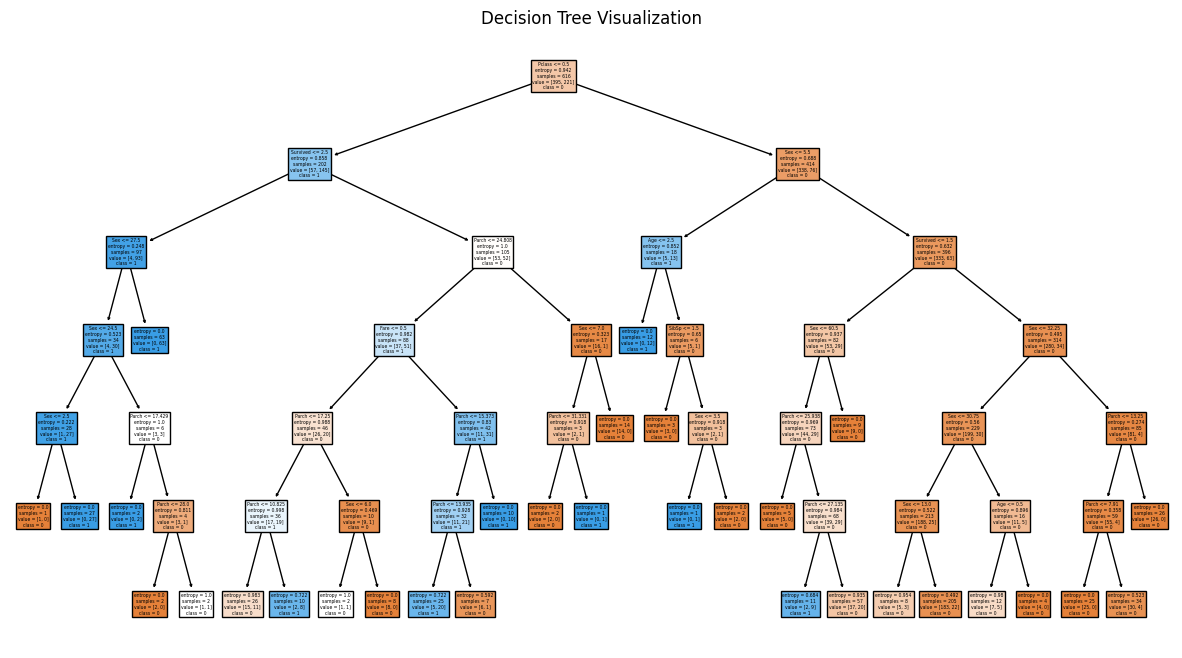

In [67]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,8))
plot_tree(Best_Dt_Model, feature_names=data_train.columns,class_names=["0","1"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

# Creating Textual Decision Tree


In [68]:
from sklearn import tree
feature_names = data_train[["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]].columns.tolist()
text_representation = tree.export_text(Best_Dt_Model, feature_names=feature_names)
print(text_representation)

|--- Sex <= 0.50
|   |--- Pclass <= 2.50
|   |   |--- Age <= 27.50
|   |   |   |--- Age <= 24.50
|   |   |   |   |--- Age <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  2.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Age >  24.50
|   |   |   |   |--- Fare <= 17.43
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  17.43
|   |   |   |   |   |--- Fare <= 28.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Fare >  28.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- Age >  27.50
|   |   |   |--- class: 1
|   |--- Pclass >  2.50
|   |   |--- Fare <= 24.81
|   |   |   |--- Embarked <= 0.50
|   |   |   |   |--- Fare <= 17.25
|   |   |   |   |   |--- Fare <= 10.82
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Fare >  10.82
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- Fare >  17.25
|   |   |   |   |   |--- Age <= 6.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  6.00
|   |   



---



# Data Preprocessing for Testing

In [69]:
data_test=orginal_data_test.copy()
data_test["Age"]=data_test["Age"].fillna(data_test["Age"].mean())
data_test["Fare"]=data_test["Fare"].fillna(data_test["Fare"].mean())
data_test=data_test.drop("Cabin", axis=1)

data_test=data_test.drop("Name", axis=1)

data_test=data_test.drop("Ticket", axis=1)
data_test["Sex"]=data_test["Sex"].apply(lambda x: gender[x])
data_test["Embarked"]=data_test["Embarked"].apply(lambda x: Embarked[x])

In [70]:
data_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,1,34.50000,0,0,7.8292,2
1,893,3,0,47.00000,1,0,7.0000,0
2,894,2,1,62.00000,0,0,9.6875,2
3,895,3,1,27.00000,0,0,8.6625,0
4,896,3,0,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,8.0500,0
414,1306,1,0,39.00000,0,0,108.9000,1
415,1307,3,1,38.50000,0,0,7.2500,0
416,1308,3,1,30.27259,0,0,8.0500,0


# Generating Predictions
## Using the best-performing model after evaluation, Decision Tree Classifier, to generate predictions:

* Prepare the Test Data: Ensure the test dataset is formatted correctly by retaining the necessary features and isolating the PassengerId column for submission.

* Generate Predictions: Use the trained Decision Tree Classifier model to predict the target variable on the test dataset.

* Create Submission File: Combine the predictions with the PassengerId column into a new DataFrame, and save it as a .csv file for submission.


In [71]:
passenger_ids = data_test[["PassengerId"]]

data_test = data_test.iloc[:, 1:]


predictions = Best_Dt_Model.predict(data_test)

## Creating a DataFrame of Predictions


In [72]:
submission = pd.DataFrame({
    "PassengerId": passenger_ids["PassengerId"],  
    "Survived": predictions
})


# Exporting Predictions


In [73]:
submission.to_csv("submission.csv", index=False)

print("The submission.csv file was created successfully!")

The submission.csv file was created successfully!


| Name | Contact Information |
|---|---|
| Feras Alshash | ferasalshash@gmail.com |
|  | https://www.linkedin.com/in/feras-alshash-bb3106a9/ |
|  | https://github.com/FerasAlshash 